PROBLEM STATEMENT

Our client is a meal delivery company which operates in multiple cities. They have various fulfillment /packaging warehouses in these cities for dispatching meal orders to their customers. The client wants us to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.




BUISNESS BENEFITS

The replenishment of raw materials is done only on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance.
Therefore predicting the Demand helps in reducing the wastage of raw materials which would result in the reduced cost of operation. Increased customer satisfaction by timely fulfilling their expectations and requirements.

**AIM**

The main aim of this project is to create an appropriate machine learning model` to forecast then number of orders to gather raw materials for next ten weeks. `

**INFORMATION REQUIRED**

To achieve this, we should know the information about of fulfilment center like area, city etc., and meal information like category of food, sub category of food, price of the food  in particular week. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train=pd.read_csv('/content/train.csv') 
test=pd.read_csv('/content/test.csv')
meal_info=pd.read_csv("/content/meal_info.csv")
center_info=pd.read_csv("/content/fulfilment_center_info.csv")

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,3.343640e+05,334364.000000,334364.000000,334364.000000,334364.000000,334364.000000,334364.000000,334364.000000,334364.000000
mean,1.249881e+06,55.723648,82.172261,2021.863218,329.918063,351.383356,0.080353,0.106872,265.043740
std,1.444019e+05,30.933471,46.006313,547.119516,152.413115,159.082532,0.271839,0.308950,406.796501
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000
25%,1.124644e+06,29.000000,43.000000,1543.000000,227.980000,242.530000,0.000000,0.000000,54.000000
50%,1.249848e+06,56.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,136.000000
75%,1.374879e+06,83.000000,110.000000,2539.000000,438.500000,454.930000,0.000000,0.000000,325.000000
max,1.499999e+06,108.000000,186.000000,2956.000000,738.230000,738.230000,1.000000,1.000000,24299.000000


Following columns are having 0 values


*   emailer_for_promotion	
*   homepage_featured



Checking for NULL values in training dataset

In [ ]:
train.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [ ]:
train.shape

(334364, 9)

NULL values in meal_info dataset

In [ ]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
 meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
meal_info.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

NULL values in center_info dataset

In [ ]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [ ]:
center_info.info(memory_usage='deep')
#memory usgae return the memory usage for each column in bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.3 KB


In [ ]:
center_info.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [ ]:
meal_info.describe(include=['object'])

,category,cuisine
count,51,51
unique,14,4
top,Beverages,Thai
freq,12,15


Data Exploration

In [ ]:
train=pd.merge(train,meal_info,on='meal_id',how='inner')

In [ ]:
train=train.merge(center_info,on='center_id',how='inner')

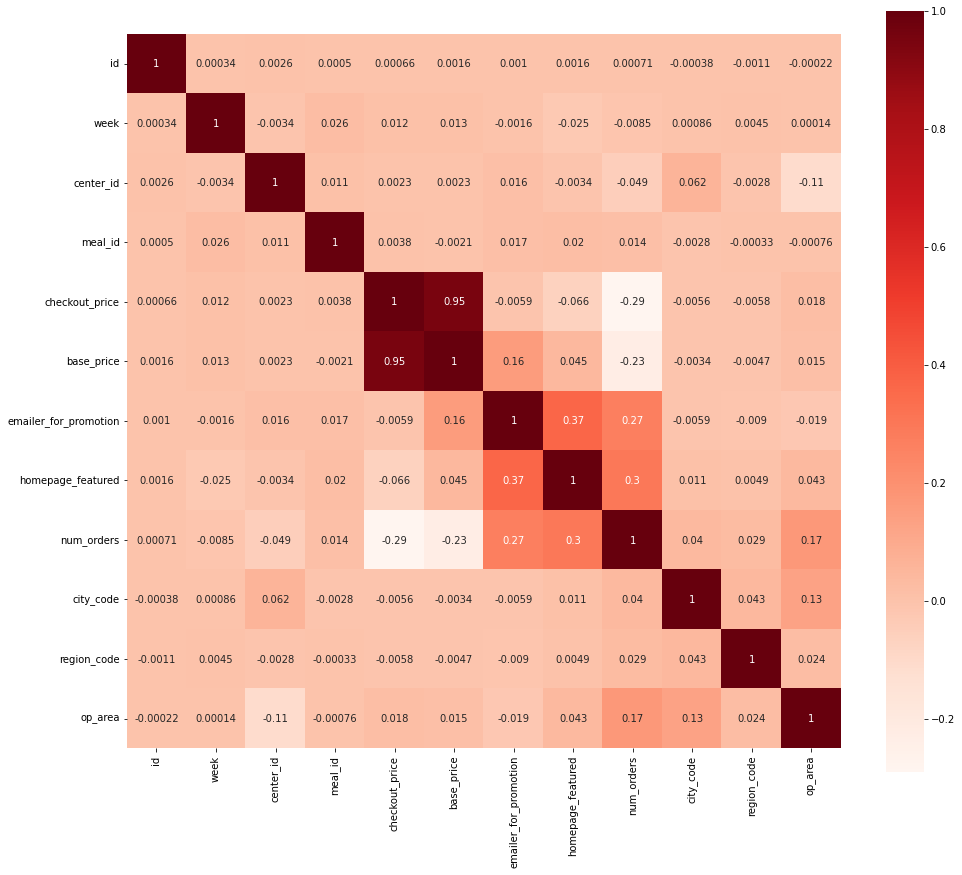

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(train.corr(),annot=True, square=True, cmap='Reds')

Strong correlation between base price and checkout price

Text(0.5, 0, 'Center Type')

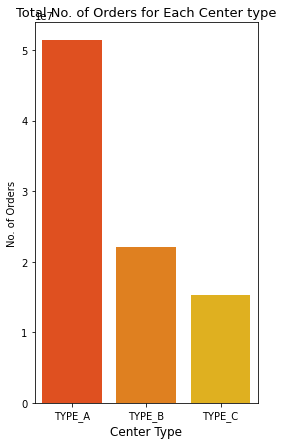

In [ ]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type', data=train.groupby('center_type').sum()['num_orders'].reset_index(),palette='autumn');
plt.ylabel('No. of Orders',)
plt.xlabel('Center Type',fontdict={'fontsize':12})


In [ ]:
train.groupby('center_type').sum()['num_orders'].reset_index()

,center_type,num_orders
0,TYPE_A,51355974
1,TYPE_B,22042828
2,TYPE_C,15222283


Type_A Centers have the highest number of Orders placed and Type_C has the least.

In [ ]:
train['center_id'].nunique()

77

The are are 77 Fullfilment Centers in total.

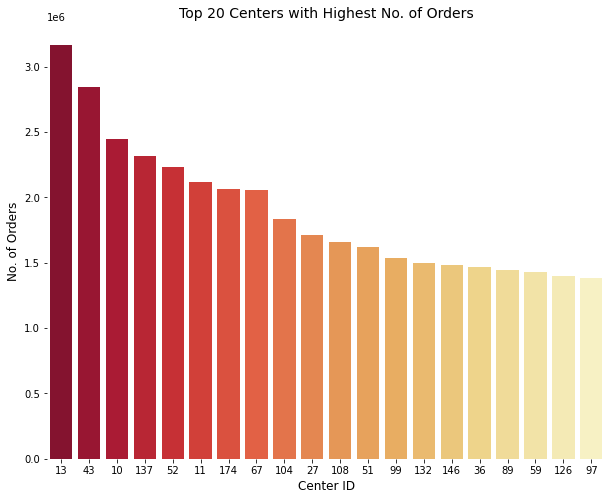

In [ ]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

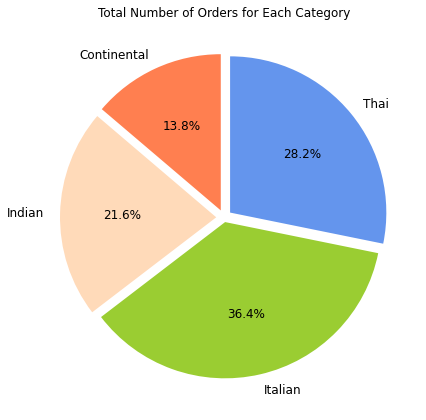

In [ ]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train.groupby(['cuisine']).num_orders.sum(),
    labels=train.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

Italian Cuisine has the highest number of orders with Continental cuisine being the least.

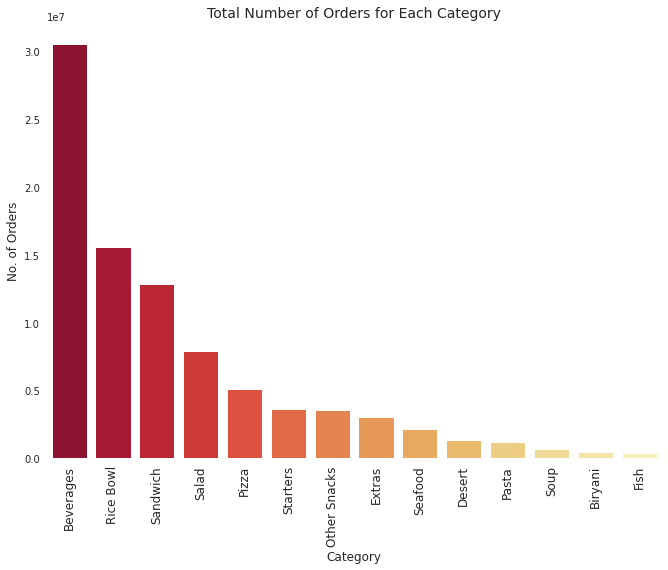

In [ ]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=train.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

We could see that Beverages are the food category which has the higest number of orders and Biriyani is the food category with least number of orders.

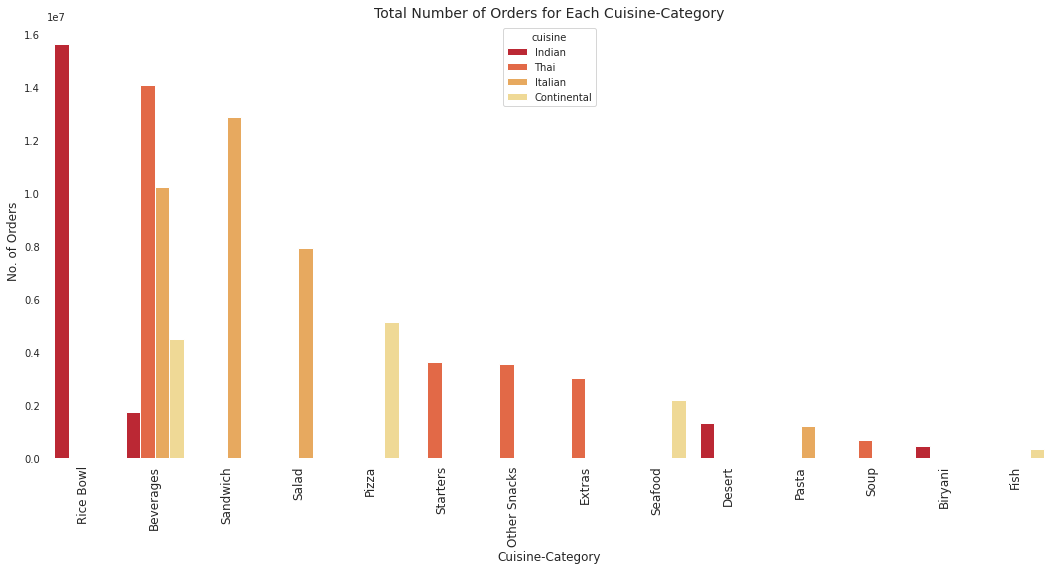

In [ ]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='category',y='num_orders',data=train.groupby(['cuisine','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine',palette='YlOrRd_r')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Similary when we checked which specific cuisne-food category has the highest number of orders, we could see that Indian-Rice Bowl has the highest number of orders and Indian-Biriyani has the least.

In [ ]:
pd.pivot_table(data=meal_info,index='category',columns=['cuisine'],aggfunc={'category':'count'},fill_value=0)

category                    
cuisine      Continental Indian Italian Thai
category                                    
Beverages              3      3       3    3
Biryani                0      3       0    0
Desert                 0      3       0    0
Extras                 0      0       0    3
Fish                   3      0       0    0
Other Snacks           0      0       0    3
Pasta                  0      0       3    0
Pizza                  3      0       0    0
Rice Bowl              0      3       0    0
Salad                  0      0       3    0
Sandwich               0      0       3    0
Seafood                3      0       0    0
Soup                   0      0       0    3
Starters               0      0       0    3

In [ ]:
print('Total orders Per Week:-')
for i in train.week.unique():
    print(f'week-{i}--->{train[train.week==i].num_orders.sum()} orders.')

Total orders Per Week:-
week-1--->792261 orders.
week-2--->787084 orders.
week-3--->695262 orders.
week-4--->743529 orders.
week-5--->1198675 orders.
week-6--->947288 orders.
week-7--->934803 orders.
week-8--->670518 orders.
week-9--->723243 orders.
week-10--->811825 orders.
week-11--->772225 orders.
week-12--->690259 orders.
week-13--->656102 orders.
week-14--->636981 orders.
week-15--->651719 orders.
week-16--->611515 orders.
week-17--->820285 orders.
week-18--->932560 orders.
week-19--->787196 orders.
week-20--->677834 orders.
week-21--->707013 orders.
week-22--->834111 orders.
week-23--->773271 orders.
week-24--->647341 orders.
week-25--->749583 orders.
week-26--->805805 orders.
week-27--->740014 orders.
week-28--->648863 orders.
week-29--->625414 orders.
week-30--->915399 orders.
week-31--->783214 orders.
week-32--->1034202 orders.
week-33--->730936 orders.
week-34--->693603 orders.
week-35--->630458 orders.
week-36--->724865 orders.
week-37--->877853 orders.
week-38--->974566 ord

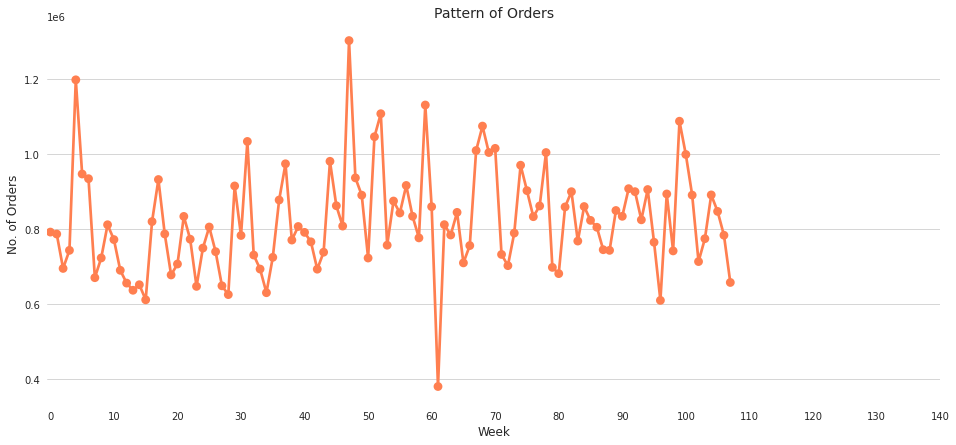

In [ ]:
fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders',fontdict={'fontsize':14})

sns.pointplot(x=train.groupby('week').sum().reset_index()['week'],y=train.groupby('week').sum().reset_index()['num_orders'],color='coral')
plt.xticks(range(0, 150, 10), list(np.arange(0,160,10)))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Week',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

When we analysed the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

In [ ]:
train[(train.homepage_featured==1) & (train.emailer_for_promotion==1)].groupby(by=['center_type','category']).agg(avg_area_op=pd.NamedAgg('op_area','mean'),
                                          avg_base_price=pd.NamedAgg('base_price','mean'),
                                          avg_checkout_price=pd.NamedAgg('checkout_price','mean'),
                                            max_base_price=pd.NamedAgg('base_price','max'),max_checkout_price=pd.NamedAgg('base_price','max'),
                                            homepage_and_email=pd.NamedAgg('homepage_featured','count'),
                                          total_num_of_orders=pd.NamedAgg("num_orders",'sum'))
                                                            

avg_area_op  avg_base_price  avg_checkout_price  \
center_type category                                                        
TYPE_A      Beverages        4.151136      254.276648          192.941525   
            Desert           4.142049      480.665760          369.568304   
            Other Snacks     3.911211      288.021166          243.141031   
            Pasta            4.138136      444.845706          366.339435   
            Pizza            4.123246      645.671403          483.329424   
            Rice Bowl        4.086682      333.756292          227.767118   
            Salad            4.099815      282.620776          209.894030   
            Sandwich         4.080355      295.933783          219.398328   
            Seafood          4.171451      660.582313          452.280678   
            Starters         4.103470      286.473754          204.998549   
TYPE_B      Beverages        4.819885      256.304726          187.187406   
            Desert           4.691791      487.411343          366.641791   
            Other Snacks     4.086747      289.966867          243.512048   
            Pasta            4.674850      444.311078          362.965928   
            Pizza            4.705780      646.729019          482.052272   
            Rice Bowl        4.744850      333.415515          228.205880   
            Salad            4.801075      282.389624          207.620108   
            Sandwich         4.792793      294.369399          219.048108   
            Seafood          4.883579      655.555032          451.773116   
            Starters         4.726263      286.079596          203.848485   
TYPE_C      Beverages        3.312500      255.531599          194.495349   
            Desert           3.404598      477.770000          369.759540   
            Other Snacks     3.421429      285.968929          243.259643   
            Pasta            3.504167      442.687639          367.541250   
            Pizza            3.396687      645.505377          483.028509   
            Rice Bowl        3.225150      339.916078          234.321198   
            Salad            3.270647      274.974328          205.273532   
            Sandwich         3.214545      293.364000          220.395896   
            Seafood          3.503691      654.831477          451.017651   
            Starters         3.464646      286.651212          203.635354   

                          max_base_price  max_checkout_price  \
center_type category                                           
TYPE_A      Beverages             476.33              476.33   
            Desert                602.43              602.43   
            Other Snacks          292.03              292.03   
            Pasta                 641.23              641.23   
            Pizza                 728.53              728.53   
            Rice Bowl             447.23              447.23   
            Salad                 363.81              363.81   
            Sandwich              367.69              367.69   
            Seafood               709.13              709.13   
            Starters              292.03              292.03   
TYPE_B      Beverages             476.33              476.33   
            Desert                737.23              737.23   
            Other Snacks          313.37              313.37   
            Pasta                 553.93              553.93   
            Pizza                 680.03              680.03   
            Rice Bowl             447.23              447.23   
            Salad                 362.81              362.81   
            Sandwich              329.86              329.86   
            Seafood               709.13              709.13   
            Starters              292.03              292.03   
TYPE_C      Beverages             479.24              479.24   
            Desert                563.63              563.63   
            Other Snacks 

In [ ]:
train.homepage_featured.value_counts()

0    298630
1     35734
Name: homepage_featured, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['category']=le.fit_transform(train['category'])
train['cuisine']=le.fit_transform(train['cuisine'])
train['center_type']=le.fit_transform(train['center_type'])

In [ ]:
train.drop(['center_id','meal_id','id'],axis=1,inplace=True)

In [ ]:
def outlier_func(df,*col):
    for i in col:
        Q1,Q3 = np.percentile(df[i],[25,75])   
        IQR = Q3-Q1                              # getting IQR 
        LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
        UpperRange = Q3+(1.5 * IQR)
        index_del=df[(df[i]<LowerRange) | (df[i]>UpperRange)].index
        df.drop(index_del,inplace=True)
    return df

In [ ]:
train.shape

(334364, 12)

In [ ]:
outlier_func(train,*(train.columns.to_list()))

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
3794,62,145.56,145.56,0,0,379,0,3,614,85,1,3.6
3877,62,142.59,143.59,0,0,231,0,3,614,85,1,3.6
3924,1,135.86,135.86,0,0,391,0,3,614,85,1,3.6
3925,2,136.83,136.83,0,0,419,0,3,614,85,1,3.6
3926,3,135.83,136.83,0,0,406,0,3,614,85,1,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...
334359,101,486.03,582.03,0,0,68,4,0,473,77,0,4.5
334360,102,581.03,581.03,0,0,69,4,0,473,77,0,4.5
334361,103,582.03,582.03,0,0,96,4,0,473,77,0,4.5
334362,105,583.03,583.03,0,0,69,4,0,473,77,0,4.5


In [ ]:
train.shape

(237924, 12)

In [ ]:
train2 = train.copy()
correlation = train2.corr(method='pearson')
columns= correlation.nlargest(8,'num_orders').index
columns

Index(['num_orders', 'cuisine', 'op_area', 'category', 'region_code',
       'city_code', 'week', 'center_type'],
      dtype='object')

In [ ]:
train2.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
3794,62,145.56,145.56,0,0,379,0,3,614,85,1,3.6
3877,62,142.59,143.59,0,0,231,0,3,614,85,1,3.6
3924,1,135.86,135.86,0,0,391,0,3,614,85,1,3.6
3925,2,136.83,136.83,0,0,419,0,3,614,85,1,3.6
3926,3,135.83,136.83,0,0,406,0,3,614,85,1,3.6


In [ ]:
features = columns.drop(['num_orders'])
train3 = train[features]

In [ ]:
train3.head()

,cuisine,op_area,category,region_code,city_code,week,center_type
3794,3,3.6,0,85,614,62,1
3877,3,3.6,0,85,614,62,1
3924,3,3.6,0,85,614,1,1
3925,3,3.6,0,85,614,2,1
3926,3,3.6,0,85,614,3,1


In [ ]:
X=train3.values
Y=train['num_orders'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
import xgboost as xg 
from sklearn import metrics

In [ ]:
model_xg=xg.XGBRegressor()
model_xg.fit(x_train,y_train)
y_pred_xg=model_xg.predict(x_test)
y_pred_xg[y_pred_xg<0]=0
print("RMSLE score : ",np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_xg)))
print("R2 score : ",metrics.r2_score(y_test, y_pred_xg))
print("MSE score : ",metrics.mean_squared_error(y_test, y_pred_xg))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_xg)))

[03:11:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score :  0.708968369119554
R2 score :  0.5880693171683891
MSE score :  9088.724210243716
RMSE :  95.3348006251847


In [ ]:
model_DT=DT()
model_DT.fit(x_train,y_train)
y_pred_DT=model_DT.predict(x_test)
y_pred_DT[y_pred_DT<0]=0
print("RMSLE score : ",np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_DT)))
print("R2 score : ",metrics.r2_score(y_test, y_pred_DT))
print("MSE score : ",metrics.mean_squared_error(y_test, y_pred_DT))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))

RMSLE score :  0.726799627202392
R2 score :  0.4489089289210768
MSE score :  12159.120377569965
RMSE :  110.2684015372036


In [ ]:
model_gbr=GBR()
model_gbr.fit(x_train,y_train)
y_pred_gbr=model_gbr.predict(x_test)
y_pred_gbr[y_pred_gbr<0]=0
print("RMSLE score : ",np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_gbr)))
print("R2 score : ",metrics.r2_score(y_test, y_pred_gbr))
print("MSE score : ",metrics.mean_squared_error(y_test, y_pred_gbr))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

RMSLE score :  0.7089819958250394
R2 score :  0.5880769482931054
MSE score :  9088.555839226816
RMSE :  95.3339175699122


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred[y_pred<0]=0
print("RMSLE score : ",np.sqrt(metrics.mean_squared_log_error(y_test,y_pred)))
print("R2 score : ",metrics.r2_score(y_test, y_pred))
print("MSE score : ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSLE score :  1.1199516715356306
R2 score :  0.06037775887564756
MSE score :  20731.564234755802
RMSE :  143.9845972135763


In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
clf = GridSearchCV(estimator=model_xg, 
                  param_grid=params,
                  scoring='neg_mean_squared_error', 
                   verbose=1)

In [ ]:
# clf.fit(x_train,y_train)

In [ ]:
# clf.best_params_

In [ ]:
import pickle

In [ ]:
pickle.dump(model_xg,open('new_food_demand.pkl','wb'))

In [ ]:
model_xg

XGBRegressor()

In [ ]:
test_final=pd.merge(test,meal_info,on='meal_id',how='outer')
test_final=pd.merge(test_final,center_info,on='center_id',how='outer')
test_final = test_final.drop(['meal_id',"center_id"], axis=1)

In [ ]:
test_final.shape

(32573, 12)

In [ ]:
le=LabelEncoder()
test_final['category']=le.fit_transform(test_final['category'])
test_final['cuisine']=le.fit_transform(test_final['cuisine'])
test_final['center_type']=le.fit_transform(test_final['center_type'])

In [ ]:
X_test=test_final[features].values

In [ ]:
model_pred=model_xg.predict(X_test)
model_pred[model_pred<0]=0

In [ ]:
submission=pd.DataFrame({'id':test_final['id'],'num_orders':model_pred})

In [ ]:
submission.to_csv('submission.csv',index=False)

In [ ]:
submission.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,174.297073
std,1.441580e+05,111.727463
min,1.000085e+06,0.000000
25%,1.123969e+06,77.310234
50%,1.247296e+06,141.104919
75%,1.372971e+06,282.453461
max,1.499996e+06,427.806580
